Data 620 Assignment Week 6

    Vikas Sinha


# A Simple 2-mode network


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).

### What can you infer about the relationships between (1) the women, and (2) the social events?  

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Total number of women = {}" .format(len(women)))
print("Total number of clubs = {}" .format(len(clubs)))

Total number of women = 18
Total number of clubs = 14


## Visualization of combined graph

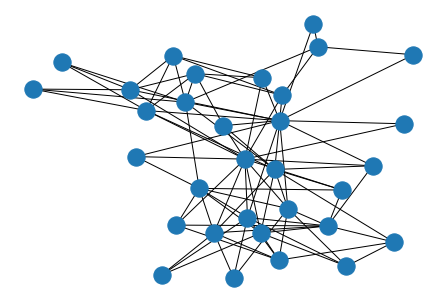

In [3]:
nx.draw(G)
plt.show()

## Visualizing the 2 modes

The visualization below depicts each club and its members. We see that most clubs have multiple members.

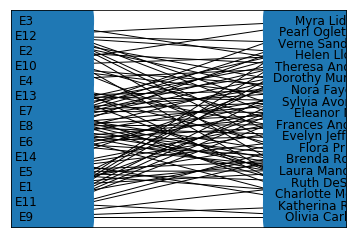

In [4]:
pos2 = nx.bipartite_layout(G, clubs, scale=10, aspect_ratio=2)
for key in pos2:
    pos2[key] *=  16

nx.draw_networkx(G, pos = pos2, node_size=18000)

## Women Network with Number of Friends

The bipartite projection degrees are shown in the next table. These represent, for each woman, the number of women that she is connected to, by virtue of being in the same clubs.

In [5]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


## Women Network with Number of Connections

The next table shows, for each member, the number of connections that she has for all clubs she is involved with. (Some of these connections will include the same friend, so this method of counting the degrees overcounts the human connections.)

In [6]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


## Women Network

This shows the weighted bipartite graph. Each weight represents a co-occurrence of membership in a club. The edges are color-coded to show different weights among the member connections.

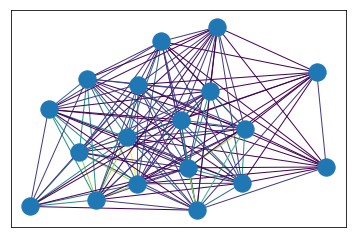

In [7]:
wnet = bipartite.weighted_projected_graph(G, women)
weights = [(edata['weight']) for f,t,edata in wnet.edges(data=True)]
nx.draw_networkx(wnet, edge_color=weights, with_labels=False)

## Find sub-components in the bipartite graph

Next we use the island method, as described in Chapter 6 in the textbook [2], to find sub-components of the graph based on the weight determined by number of membership co-occurrences. The functions *trim_edges()* and *island_method()* are copied from the book (with minor modification).

In [9]:
# These two functions are copied from the book.
def trim_edges(g, weight):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, attr_dict=edata)
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # Compute the size of the step, so we get a reasonable step in iterations
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

Below we compute, for a sequence of weight thresholds, the number of subcomponents in the bipartite women graph.

In [10]:
wsubnets = list(nx.connected_component_subgraphs(wnet))
islands = island_method(wsubnets[0])

for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    subs = list(nx.connected_component_subgraphs(i[1]))
    #print("{} {} {}". format(i[0], len(i[1]), len(nx.connected_component_subgraphs(i[1]))))
    #print("{} {}". format(i[0], len(i[1])))
    len2 = -1
    len1 = len(subs[0])
    if len(subs) > 1:
        len2 = len(subs[1])
    print("Weight:{} Graph Size:{:02} #Components:{} Length1:{:02} Length2:{:02}".
          format(i[0], len(i[1]), len(subs), len1, len2))

Weight:1 Graph Size:18 #Components:1 Length1:18 Length2:-1
Weight:2 Graph Size:15 #Components:1 Length1:15 Length2:-1
Weight:3 Graph Size:14 #Components:2 Length1:08 Length2:06
Weight:4 Graph Size:07 #Components:2 Length1:04 Length2:03
Weight:5 Graph Size:07 #Components:2 Length1:04 Length2:03
Weight:6 Graph Size:02 #Components:1 Length1:02 Length2:-1


From above, based on the results of the island method, we can see that, for Weight=3, a Bipartite graph of size 14, with 2 components of lengths 8 and 6, is produced.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

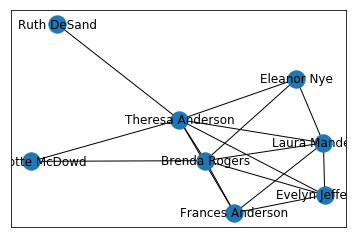

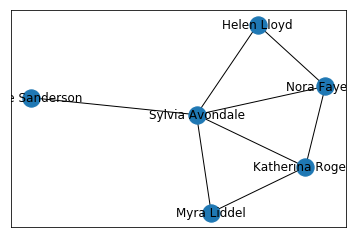

In [11]:
# Based on the above, we consider subgraphs of weight at least 3
s3 = trim_edges(wnet, 3)
subs = list(nx.connected_component_subgraphs(s3))
W1 = subs[0]
W2 = subs[1]

plt.figure(1)
nx.draw_networkx(W1)

plt.figure(2)
nx.draw_networkx(W2)
plt.show()

Above, the two subcomponents of the women bipartite projection graph, obtained by using a weight threshold of 3, are shown.

## Conclusion

To find subcomponents of the women bipartite graph, we used a weighted projection where the weights correspond to co-occurrences of membership. By setting a weight threshold of 3, we found (using the island method) that two subcomponents of the graph can be readily identified. The subcomponents were shown.

## References

1. https://networkdata.ics.uci.edu/netdata/html/davis.html
2. Tsvetovat, Maksim and Kouznetsov, Alexander (2011). Social Network Analysis for Startups. O’Reilly Media, Inc.